# Maths - Form & Function: Chapter 7 (Linear Algebra)

***

## 1. Sources of Linearity

> To say that an effect is "linear" means that the effect respects proportions and that the effect of a sum is the sum of the separate effects.

In [1]:
import math
import numpy as np

# Show that axioms are satisfied for vectors / scalars under
# addition and multiplication

F = range(0, 100) # a field of scalars
V = [np.array([x, x * 2]) for x in range(0, 100)] # a set of vectors
a, b = F[50], F[51]
v, w = V[25], V[66]

print(
    all(
        [
            np.array_equal(a * (v + w), a * v + a * w),
            np.array_equal(1 * v, v),
            np.array_equal((a + b) * v , a * v + b * v),
            np.array_equal((a * b) * v, a * (b * v))
        ]
    )
)      

True


In [2]:
def linear_combination(F, V):
    lc = sum([x * y for x in F for y in V])
    return lc

print(linear_combination(F, V))

[24502500 49005000]


In [3]:
T = sum # A transformation that preserves linear combinations

# 2 simple identities proving the transformations
print(np.array_equal(T(v + w), T(v) + T(w)))
print(np.array_equal(T(a * v), a * T(v)))

True
True


***

## 2. Transformations versus Matrices

There are 2 styles of doing linear algebra:

- Geometrically, or invariantly, with linear combinations of vectors
- Explicitly, with coordinates (which depends on a choice of basis)

In [4]:
def linear_endomorphism(u, a, j):
    """ Images from a linear endomorphism.
    u - vectors
    a - coefficients
    j - index of the basis
    """
    a = a[j]
    return sum([x * y for x in u for y in a])

def coordinates_vectors(a, i, j, x):
    """ Gives the coordinates of a transformation.
    a - coefficients
    i - index of the basis
    x - previous coordinates
    """
    a = a[i]
    return sum([l * m for l in a for m in x])

> In the 20th century, matrix multiplication had trimphant (and unexpected) applications in quantum mechanics. However, the ideas underlying matrix theory first developed from the study of elasticity or at least from the use of many-variable calculus to get linear approximations.

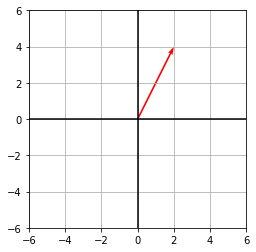

In [5]:
import matplotlib.pyplot as plt

C = np.array([2, 4])

def plot_create(plot):
    fig, ax = plot.subplots()
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_aspect('equal')
    plot.xlim(-6, 6)
    plot.ylim(-6, 6)
    return fig, ax, plot

fig, ax, plt = plot_create(plt)
plt.quiver(C[0], C[1], angles = "xy", scale_units = "xy", scale = 1, color = "r")
plt.show()

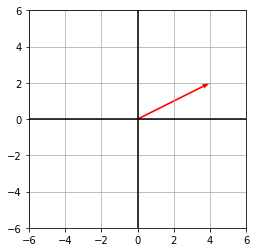

In [6]:
# Change the x & y axis
T = np.array([[0, 1], [1, 0]])
C2 = np.dot(T, C)

fig, ax, plt = plot_create(plt)
plt.quiver(C2[0], C2[1], angles = "xy", scale_units = "xy", scale = 1, color = "r")
plt.show()

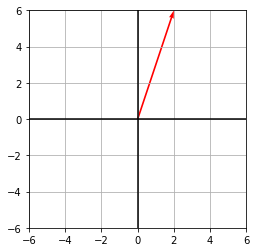

In [7]:
# Stretch y dimension
T = np.array([[1, 0], [0, 1.5]])
C2 = np.dot(T, C)

fig, ax, plt = plot_create(plt)
plt.quiver(C2[0], C2[1], angles = "xy", scale_units = "xy", scale = 1, color = "r")
plt.show()

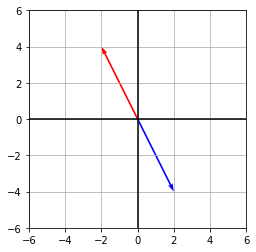

In [8]:
# Reflect on x & y
T2 = np.array([[-1, 0], [0, 1]])
C2 = np.dot(T2, C)
T3 = np.array([[1, 0], [0, -1]])
C3 = np.dot(T3, C)

fig, ax, plt = plot_create(plt)
plt.quiver(C2[0], C2[1], angles = "xy", scale_units = "xy", scale = 1, color = "r")
plt.quiver(C3[0], C3[1], angles = "xy", scale_units = "xy", scale = 1, color = "b")
plt.show()

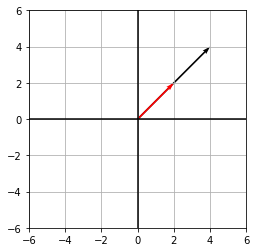

In [9]:
# Stretch y dimension
fig, ax, plt = plot_create(plt)
C2 = np.array([2, 2])
C3 = C2 * 2
plt.quiver(C3[0], C3[1], angles = "xy", scale_units = "xy", scale = 1, color = "k")
plt.quiver(C2[0], C2[1], angles = "xy", scale_units = "xy", scale = 1, color = "r")
plt.show()

***

## 3. Eigenvalues

> Two matrices $A$ and $B$ which represent the same endomorphism of $V$ relative to (possibly) different bases are said to be *similar* ... square matrices $A$ and $B$ are similar if and only if there is a non-singular matrix $P$ with $B = PAP^{-1}$

> $\lambda$ is an *eigenvalue* of an endomorphism $T$ if and only if $Tv = v\lambda$ for some non-zero vector$v$; equivalently, in matrix language, $\lambda$ is an eignenvalue of a matrix $A$ if and only if $AX = X\lambda$ for some $X \neq 0$.

> An *eigenvector* $X$ for $A$ is then any vector (zero or not) with $AX = X\lambda$ for a scalar $\lambda$

**Theorem 1.** An n X n square matrix A is similar to a diagonal matrix if and only if A has n linearly independent eigenvectors.

In [10]:
from numpy import linalg as la

A = np.array([[2, -1], [4, 3]])
eigenvalues, eigenvectors = la.eig(A)

a, b = eigenvalues
print("Eigenvalues:")
print(a)
print(b)
print()

x = eigenvectors[:, 0]
print("Eigenvectors:")
print(x)

Eigenvalues:
(2.5+1.9364916731037083j)
(2.5-1.9364916731037083j)

Eigenvectors:
[-0.1118034 +0.4330127j  0.89442719+0.j       ]


In [11]:
A_by_x = np.dot(A, x)
print(A_by_x)

[-1.11803399+0.8660254j   2.23606798+1.73205081j]


In [12]:
x_by_a = x * a
print(x_by_a)

[-1.11803399+0.8660254j   2.23606798+1.73205081j]


In [13]:
print(np.allclose(A_by_x, x_by_a))

True


In [14]:
determinant = A[0, 0] * A[1, 1]  - A[0, 1] * A[1, 0]
print(determinant)
print(math.isclose(determinant, la.det(A)))

10
True


In [15]:
trace = A[0, 0] + A[1, 1]
print(math.isclose(trace, np.trace(A)))

True


**Theorem 2.** The eigenvalues of A are the roots of its characteristic polynomial

In [16]:
import sympy

A_sym = sympy.Matrix(A)
A_sym.charpoly().as_expr()

lambda**2 - 5*lambda + 10

***

## 4. Dual Spaces

> Vector spaces come naturally in pairs, acting on each other. Thus the matrix product of a row by a column is a scalar; by this product, the "row vectors" may be regarded as linear functions of the "column vectors", and vice-versa.

> If $X = V$ is itself a vector space over $F$, it is natural to consider those functions $f: V \rightarrow F$ which are linear. Under the pointwise operations they 
constitute a vector space (a subspace of $F^V$) called the *dual space* of $V$.

$$
V^* = hom(V,F) = \{f \;| \;f : V \rightarrow F\;linear\}
$$

Due to the *dual basis* being a *dual space* version of the *basis*, we can conclude that:

<center>
dim $V$ finite implies dim $V^*$ = dim $V$
</center>

**Theorem.** Let $W$ and $V$ be finite dimensional vector spaces over $F$. If $b: W \times V \rightarrow F$ is bilinear, and if for all $w_0$ and $v_0$  

$$
b(w_0,-) = 0 \;implies \; w_0 = 0, \; b(-,v_0) = 0 \; implies \; v_0 = 0
$$

then $b$ determines isomorphism $W \cong V^*$ and $V \cong W^*$)

***

## 5. Inner Product Spaces

> For many geometric purposes, linear vector spaces are not enough. For example, a linear transformation does carry straight lines to straight lines, but it can distort angles, change circles into ellipses, and generally alter distances.

> An *inner product space E* is thus defined to be a vector space $E$ over the field $R$ of reals with an inner product - a real valued function $u \cdot v$ of two vectors $u$ and $v$ - which is bilinear, symmetric, and positive definitive.

> The inner product is automatically a dual pairing of the space with itself. Hence each finite dimensional space with an inner product is isomorphic to its dual space - because each vector $v$ is also a linear function "inner product with $v$". Hence for *such* spaces one can drop the distinction between a space and its dual.

***


## 6. Orthogonal Matrices

> In a space with an inner product one has all the concepts of Euclidean geometry: One cand define spheres and rigid motions.

In [17]:
X = np.array(
    [[2,
      1,
      3]]
) # column vector

A = np.array( # an orthogonal square matrix
    [[1, 0, 2],
     [0, 1, 0],
     [0, 0, 1]]
)

A * X

array([[2, 0, 6],
       [0, 1, 0],
       [0, 0, 3]])

In [18]:
A.T # transpose reverses around the diagonal

array([[1, 0, 0],
       [0, 1, 0],
       [2, 0, 1]])

In [19]:
A * A.T # array multiplied by transpose is equal to identity

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [20]:
A.T * A

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [21]:
print(np.array_equal(A * A.T, np.identity(3)))
print(np.array_equal(A.T * A, np.identity(3)))

True
True


In [22]:
# Calculating the determinant for various values in row 2, col 2

B = np.array(
    [[2, 3],
     [2, 3]]
)

for x in range(1, 6):
    B[1, 1] = x
    print(np.linalg.det(B))

-4.0
-2.0
0.0
2.0
4.0


In [23]:
# Determinant of an orthogonal matrix

C = np.array(
    [[1, 3],
     [0, 1]]
)

np.linalg.det(C)

1.0

In [24]:
X = np.array(
    [[1, 3],
     [2, 1]]
)

Y = np.array(
    [[1, 2],
     [3, 2]]
)

Z = np.inner(X, Y)

# The determinant of a product is the product of the determinants:
print("x = " + str(np.linalg.det(X)))
print("y = " + str(np.linalg.det(Y)))
print("z = " + str(np.linalg.det(Z)))

x = -5.000000000000001
y = -4.000000000000001
z = 20.000000000000007


In [25]:
from math import cos, sin, radians

def A_theta(M, theta):
    theta = radians(theta)
    c, s = cos(theta), sin(theta)
    return np.dot(M, np.array(
        [[c, -s],
         [s, c]]
    ))

X = np.array(
    [[1, 4],
     [0, 2]]
)


print("Original:")
print(X)
print("\n45 degrees:")
x1 = A_theta(X, 45)
print(x1)
print("\n90 degrees:")
x2 = A_theta(X, 90)
print(x2)
print("\n180 degrees:")
x3 = A_theta(X, 180)
print(x3)
print("\n360 degrees:")
x4 = A_theta(X, 270)
print(x4)

Original:
[[1 4]
 [0 2]]

45 degrees:
[[3.53553391 2.12132034]
 [1.41421356 1.41421356]]

90 degrees:
[[ 4.0000000e+00 -1.0000000e+00]
 [ 2.0000000e+00  1.2246468e-16]]

180 degrees:
[[-1.0000000e+00 -4.0000000e+00]
 [ 2.4492936e-16 -2.0000000e+00]]

360 degrees:
[[-4.0000000e+00  1.0000000e+00]
 [-2.0000000e+00 -3.6739404e-16]]


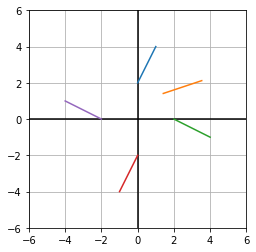

In [26]:
fig, ax, plt = plot_create(plt)
plt.plot(X[:, 0] , X[:, 1])
plt.plot(x1[:, 0] , x1[:, 1])
plt.plot(x2[:, 0] , x2[:, 1])
plt.plot(x3[:, 0] , x3[:, 1])
plt.plot(x4[:, 0] , x4[:, 1])
plt.show()

> The eigenvalues of an orthogonal matrix $A$ (and hence of an orthogonal transformation) are always complex numbers of absolute value 1.

> An orthogonal transformation may also be described as a rigid motion which leaves the origin (the vector 0) fixed. Just as in the plane, the most general rigid motiion of an *n*-dimensional inner produce space is an orthogonal transformation followed by a translation.

> To summarize, we see that the geometric ideas of space, transformation, and rigid motion extend naturally beyond two and three dimensions (and, for analysis, into infinite dimensions) and have an effective algebraic formalization by vector spaces, linear orthogonal transformations, and their representations by matrices.

***

## 7. Adjoints

The code below proves the following is true:

$$
(T^*v) \cdot u = v \cdot Tu
$$

In [27]:
# Two vectors from vector space E
v = np.array([1, 2, 3])
u = np.array([3, 4, 3])

# A linear transformation as square matrix
T = np.array(
    [[1, 2, 3],
     [1, 2, 3],
     [1, 2, 3]]
)

# Proof of the equality
T.T.dot(v).dot(u)  == v.dot(T.dot(u))

True

In [28]:
# The adjoint of T
T.T

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [29]:
i = 0
j = 1

# Shows that the rule applies to individual dimensions of the matrix & vectors
T[j].dot(u) == sum(u[:] * T[:, j])

True

> In short, adjoint transformations have transposed matrices (relative to orthonormal bases). This is the intrinsic meaning of a transposed matrix.

> A linear endomorphism $T: E \rightarrow E$ is *self-adjoint* when $T^* = T$; that is, when its matrix $A$ relative to any normal orthogonal basis is symmetric (equal to its transpose).

In [30]:
# T self-adjoint is symmetrical
T = np.array(
    [[1, 2, 3],
     [2, 3, 4],
     [3, 4, 5]]
)

np.array_equal(T, T.T)

True

**Theorem.** All the eigenvalues of a self-adjoint $T: E \rightarrow E$ are real.

## 8. The Principal Axis Theorem

> **Theorem 1.** In an inner product space, each self-adjoint $T: E \rightarrow E$ has a diagonal matrix relative to a suitable orthonormal basis of $E$.

The *principal axis theorem* can be stated in 2 ways:

- matrix of a self adjoint transformation:
    - "For every real symmetric marix $A$ there is an orthogonal matrix $P$ with $P^{-1}AP$ diagonal
- quadratic:
    - "For every real symmetric matrix $A$ there is an orthogonal matrix $P$ with $P^TAP$ diagonal

A version of this theorem for infinite dimensions is called the *spectral theorem*; for complex numbers there is a similar theorem that works over *hermitian* matrices - those matrices equal to their conjugate transpose.

## 9. Bilinearity and Tensor Product

> **Theorem 1.** Given two vector spaces $U$ and $V$ over a field $F$ there is a third vector space $U \otimes V$ and a bilinear function

$$
\otimes : U \times V \to U \otimes V
$$

> with the following property: Whenever $B$ is a bilinear function (1) on $U$ and $V$ to any third space $W$ over $F$, there is a unique linear transformation $T: U \otimes V \to W$ such that

$$
B(u,v) = T(u \otimes v)
$$

> holds for all vectors $u \in U$ and $v \in V$.

The dimension for the tensor product (of finite dimensional spaces) is:

$$
dim(U \otimes V) = (dim  U)(dim  V)
$$

The tensor product allows for changing the field of scalars; for example, a real vector space whne multiplied by complex numbers will result in a complex field.

---

## 10. Collapse by Quotients

> If one wishes to ignore a particular vector $u_0$ and its multiples, one may map $V$ into a newly constructed space in which exactly the subspace consisting of these multiples is mapped to zero. For example, in cartesian 3-space the vertical projection onto the $x - y$ plane collapses exactly all the multiples of the unit $z$-vector.

This process works with any subspace $S$ of $V$ giving us:

- $V/S$ = the *quotient space*
- linear transformation $P:V \rightarrow V/S$ with $P(S) = 0$

& the following universal property:

> Any linear transformation $T: V \rightarrow W$ into a third vector space $W$ for which $T(S) = 0$ can be written as a composite $T = T' P$ for a unique linear transformation $T': V/S \rightarrow W$ ...

> [we may] ... collapse any given collection of vectors $s_1, ..., s_k$ of a space $V$ - simply take the subspace $S$ to be the set of all linear combinations $a_1s_1 + ... + a_ks_k$ of these vectors; that is, the subspace *spanned* by the $s_i$; clearly any transformation $T$ which maps all $s_i$ to zero must map to zero all of the subspace.

---

## 11. Exterior Algebra and Differential Forms